In [2]:
from google.colab import files
uploaded = files.upload()

Saving final_data_product.csv to final_data_product.csv


In [1]:
from google.colab import files
uploaded = files.upload()

Saving f1sim-ref-left.csv to f1sim-ref-left.csv
Saving f1sim-ref-line.csv to f1sim-ref-line.csv
Saving f1sim-ref-right.csv to f1sim-ref-right.csv
Saving f1sim-ref-turns.csv to f1sim-ref-turns.csv


In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("final_data_product.csv")
df

,lap_id,invalid_lap,BPS_SPEED,BPS_THROTTLE,BPS_STEER,BPS_BRAKE,BPS_CURRENTLAPTIMEINMS,BPS_LAPDISTANCE,BPS_WORLDPOSITIONX,BPS_WORLDPOSITIONY,...,dist_530_YAW,dist_530_PITCH,dist_530_ROLL,dist_530_left_dist,dist_530_right_dist,dist_530_dist_apex_1,dist_530_dist_apex_2,dist_530_angle_to_apex1,dist_530_angle_to_apex2,dist_530_proj_from_ref
0,10021698834789871149_1,1,316.0,1.000000,0.074568,0.0,2615.0,223.0,274.071987,313.458779,...,-2.715189,0.000475,-0.016953,1.741342,10.851370,132.666175,33.599712,-177.333510,-157.363838,3.100772
1,10021698834789871149_10,1,324.0,0.970802,0.000464,0.0,3097.0,273.0,310.096901,278.846172,...,-2.677639,-0.002429,-0.010994,5.229576,7.362893,134.315712,34.235318,-178.276773,-162.785343,0.365266
2,10021698834789871149_11,1,322.0,1.000000,-0.002375,0.0,2976.0,258.0,298.743940,288.688005,...,-2.672484,-0.003209,-0.015086,4.491344,8.101110,133.962370,34.073817,-177.906287,-161.483133,0.368740
3,10021698834789871149_12,0,322.0,0.025177,0.006011,0.0,3049.0,269.0,307.165908,281.569461,...,-2.683784,-0.003549,-0.013458,4.000375,8.592165,133.726732,33.972230,-177.665140,-160.617290,0.856654
4,10021698834789871149_13,1,324.0,1.000000,0.021114,0.0,3046.0,268.0,306.397540,282.215448,...,-2.576070,0.002121,-0.016932,5.969796,6.622633,134.674490,34.413890,-179.086529,-164.518584,1.101108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,9874269645241895165_2,1,144.0,0.000000,-0.525250,0.0,6234.0,450.0,369.369267,134.915112,...,-2.670881,0.003020,-0.000062,0.781471,11.886334,128.781581,29.677781,-178.004607,-156.571125,3.664728
1028,9941972541231747669_1,1,324.0,1.000000,0.000000,0.0,2979.0,263.0,302.615240,285.497492,...,-2.689289,-0.003212,-0.016119,2.482649,10.109993,133.011217,33.706067,-177.128822,-158.125436,2.364715
1029,9941972541231747669_2,0,324.0,1.000000,-0.000000,0.0,3014.0,264.0,303.184481,284.646456,...,-2.691542,-0.003572,-0.011709,3.187732,9.404851,133.342247,33.821835,-177.350536,-159.259773,1.664493
1030,9948558370850722411_1,1,324.0,1.000000,-0.003344,0.0,3149.0,276.0,301.987594,286.287858,...,-2.532977,0.004081,-0.015205,1.779133,10.876460,130.089505,30.731174,-178.246422,-158.331977,2.772034


In [4]:
DROPPED = [
    "dist_360_SPEED", "dist_360_THROTTLE", "dist_360_STEER", "dist_360_BRAKE",
    "dist_360_CURRENTLAPTIMEINMS", "dist_360_LAPDISTANCE", "dist_360_WORLDPOSITIONX", "dist_360_WORLDPOSITIONY",
    "dist_360_WORLDFORWARDDIRX", "dist_360_WORLDFORWARDDIRY", "dist_360_YAW", "dist_360_PITCH",
    "dist_360_ROLL", "dist_360_left_dist", "dist_360_right_dist", "dist_360_dist_apex_1",
    "dist_360_dist_apex_2", "dist_360_angle_to_apex1", "dist_360_angle_to_apex2", "dist_360_proj_from_ref",
    "dist_430_SPEED", "dist_430_THROTTLE", "dist_430_STEER", "dist_430_BRAKE",
    "dist_430_CURRENTLAPTIMEINMS", "dist_430_LAPDISTANCE", "dist_430_WORLDPOSITIONX", "dist_430_WORLDPOSITIONY",
    "dist_430_WORLDFORWARDDIRX", "dist_430_WORLDFORWARDDIRY", "dist_430_YAW", "dist_430_PITCH",
    "dist_430_ROLL", "dist_430_left_dist", "dist_430_right_dist", "dist_430_dist_apex_1",
    "dist_430_dist_apex_2", "dist_430_angle_to_apex1", "dist_430_angle_to_apex2", "dist_430_proj_from_ref",
    "dist_530_SPEED", "dist_530_THROTTLE", "dist_530_STEER", "dist_530_BRAKE",
    "dist_530_CURRENTLAPTIMEINMS", "dist_530_LAPDISTANCE", "dist_530_WORLDPOSITIONX", "dist_530_WORLDPOSITIONY",
    "dist_530_WORLDFORWARDDIRX", "dist_530_WORLDFORWARDDIRY", "dist_530_YAW", "dist_530_PITCH",
    "dist_530_ROLL", "dist_530_left_dist", "dist_530_right_dist", "dist_530_dist_apex_1",
    "dist_530_dist_apex_2", "dist_530_angle_to_apex1", "dist_530_angle_to_apex2", "dist_530_proj_from_ref",
    "BPS_right_dist", "BPE_right_dist", "THS_right_dist", "THE_right_dist", "STS_right_dist",
    "STM_right_dist", "STE_right_dist", "APX1_right_dist", "APX2_right_dist", "BPS_CURRENTLAPTIMEINMS",
    "BPE_CURRENTLAPTIMEINMS", "THS_CURRENTLAPTIMEINMS", "THE_CURRENTLAPTIMEINMS", "STS_CURRENTLAPTIMEINMS",
    "STM_CURRENTLAPTIMEINMS", "STE_CURRENTLAPTIMEINMS", "APX1_CURRENTLAPTIMEINMS", "APX2_CURRENTLAPTIMEINMS"
    # added all the currentlaptimeinms for each moment as well since thats not controlled by driver - Muhammad
]
data = df.drop(columns=DROPPED).dropna().drop_duplicates()
target_mean = data["Target_CURRENTLAPTIMEINMS"].mean()
target_std = data["Target_CURRENTLAPTIMEINMS"].std()
data = data[data['Target_CURRENTLAPTIMEINMS'] < target_mean + 3 * target_std] # removes 12 longest times
X = data.drop(columns=["lap_id","invalid_lap", "Target_CURRENTLAPTIMEINMS"])
y = data["Target_CURRENTLAPTIMEINMS"]

In [12]:
target_columns = [
    'target_CURRENTLAPTIMEINMS', '_LAPDISTANCE', '_WORLDPOSITIONX',
    '_WORLDPOSITIONY', '_STEER', '_BRAKE', '_THROTTLE',
]

selected_columns = [col for col in X.columns if col.endswith(tuple(target_columns))]
#X = X[selected_columns]

#target_points = [
#    'BPS', 'BPE', 'STS', 'STE',
#]
#selected_columns = [col for col in X.columns if col.startswith(tuple(target_points))]
X = X[selected_columns]


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_y.fit_transform(y.to_numpy().reshape(-1, 1)).ravel()
m_info = mutual_info_regression(X_scaled, y)
Scores = pd.DataFrame(sorted(zip(X.columns, m_info), key=lambda x: x[1], reverse=True), columns=["feature", "mi_score"])
pd.set_option('display.max_rows', 200)
Scores

,feature,mi_score
0,STE_THROTTLE,0.239515
1,THE_ext_LAPDISTANCE,0.189523
2,STM_WORLDPOSITIONY,0.185798
3,STS_ext_LAPDISTANCE,0.182366
4,STE_LAPDISTANCE,0.181294
5,STM_THROTTLE,0.179018
6,APX2_THROTTLE,0.178274
7,STM_LAPDISTANCE,0.163725
8,STS_WORLDPOSITIONY,0.158467
9,STM_WORLDPOSITIONX,0.156693


In [14]:
X.columns

Index(['BPS_THROTTLE', 'BPS_STEER', 'BPS_BRAKE', 'BPS_LAPDISTANCE',
       'BPS_WORLDPOSITIONX', 'BPS_WORLDPOSITIONY', 'BPS_ext_LAPDISTANCE',
       'BPE_THROTTLE', 'BPE_STEER', 'BPE_BRAKE', 'BPE_LAPDISTANCE',
       'BPE_WORLDPOSITIONX', 'BPE_WORLDPOSITIONY', 'BPE_ext_LAPDISTANCE',
       'THS_THROTTLE', 'THS_STEER', 'THS_BRAKE', 'THS_LAPDISTANCE',
       'THS_WORLDPOSITIONX', 'THS_WORLDPOSITIONY', 'THS_ext_LAPDISTANCE',
       'THE_THROTTLE', 'THE_STEER', 'THE_BRAKE', 'THE_LAPDISTANCE',
       'THE_WORLDPOSITIONX', 'THE_WORLDPOSITIONY', 'THE_ext_LAPDISTANCE',
       'STS_THROTTLE', 'STS_STEER', 'STS_BRAKE', 'STS_LAPDISTANCE',
       'STS_WORLDPOSITIONX', 'STS_WORLDPOSITIONY', 'STS_ext_LAPDISTANCE',
       'STM_THROTTLE', 'STM_STEER', 'STM_BRAKE', 'STM_LAPDISTANCE',
       'STM_WORLDPOSITIONX', 'STM_WORLDPOSITIONY', 'STE_THROTTLE', 'STE_STEER',
       'STE_BRAKE', 'STE_LAPDISTANCE', 'STE_WORLDPOSITIONX',
       'STE_WORLDPOSITIONY', 'STE_ext_LAPDISTANCE', 'APX1_THROTTLE',
       'APX1

# Random Forest Model

In [15]:
#Random Forrest model
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint, uniform
#split the dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_X_split = StandardScaler()
scaler_y_split = StandardScaler()

X_train_scaled = scaler_X_split.fit_transform(X_train)
X_test_scaled = scaler_X_split.transform(X_test)

y_train_scaled = scaler_y_split.fit_transform(y_train.to_numpy().reshape(-1, 1)).ravel()
y_test_scaled = scaler_y_split.transform(y_test.to_numpy().reshape(-1, 1)).ravel()

#fit a base RF model
rf_base = RandomForestRegressor(n_estimators=100, random_state=42)
rf_base.fit(X_train, y_train)


#evaluate R2 and MSE base model
y_rfbase_pred = rf_base.predict(X_test)
print("R2 RF_base model:", round(r2_score(y_test, y_rfbase_pred),3))
rmse = np.sqrt(mean_squared_error(y_test, y_rfbase_pred))
print("RMSE RF_base model:", round(rmse,3))

R2 RF_base model: 0.571
RMSE RF_base model: 2123.723


In [16]:
# hyperparameter tuning

param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}



rf_model = RandomForestRegressor(random_state=42)

random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=75,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)
random_search_rf.fit(X_train, y_train)

print("Best parameters found:")
print(random_search_rf.best_params_)

#evaluate the random_search model
y_random_search_pred = random_search_rf.predict(X_test)
print("R2 RF_random_search model:", round(r2_score(y_test, y_random_search_pred),3))
rmse_random_search = np.sqrt(mean_squared_error(y_test, y_random_search_pred))
print("RMSE RF_random_search model:", round(rmse_random_search, 3))


Fitting 5 folds for each of 75 candidates, totalling 375 fits
Best parameters found:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
R2 RF_random_search model: 0.559
RMSE RF_random_search model: 2152.56


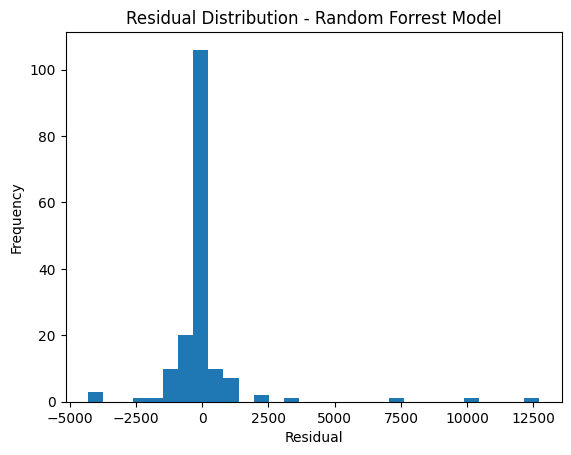

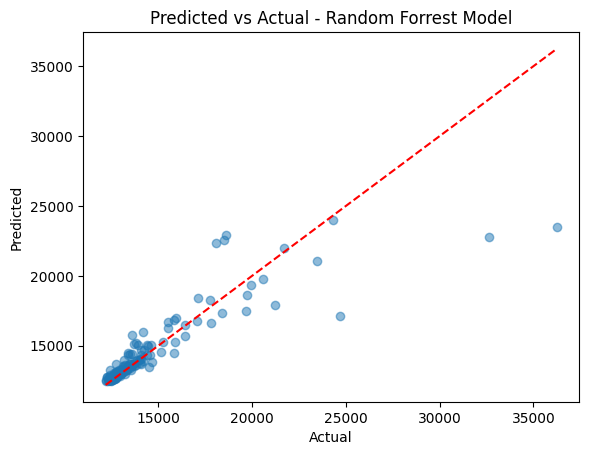

In [10]:
#assess model quality by plotting residuals and predicted vs actual values - for randomsearch RF
import matplotlib.pyplot as plt
residuals = y_test - y_random_search_pred
plt.hist(residuals, bins=30)
plt.title("Residual Distribution - Random Forrest Model")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

# Predicted vs Actual
plt.scatter(y_test, y_random_search_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual - Random Forrest Model")
plt.show()


/tmp/ipython-input-2054044590.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


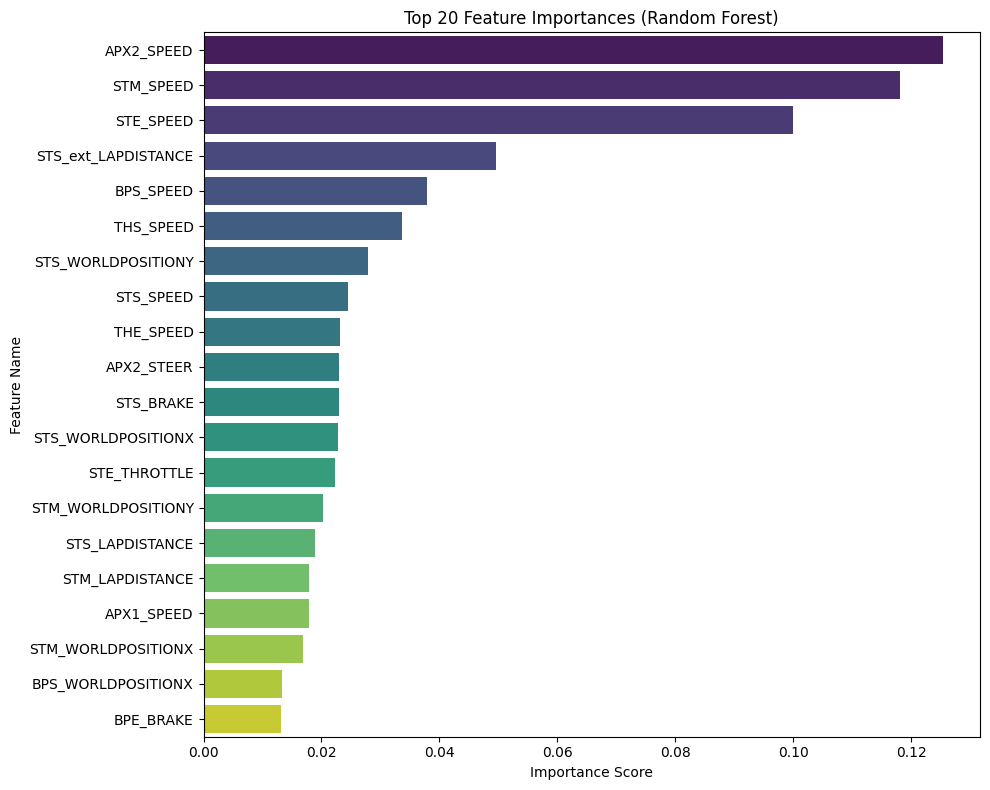

In [11]:
#analyse feature importances - randomsearch RF case
importances = random_search_rf.best_estimator_.feature_importances_
feature_names = X_train.columns
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

top_20_feat = feat_imp_df.head(20)

# Set plot style
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Importance',
    y='Feature',
    data=top_20_feat,
    palette='viridis'
)
plt.title('Top 20 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

In [12]:
percentiles = (0.000001, 0.95)
bounds = {f: (data[f].quantile(percentiles[0]), data[f].quantile(percentiles[1])) for f in X.columns}

rng = np.random.default_rng(42)
N = 50_000
candidates = {f: rng.uniform(low=b[0], high=b[1], size=N) for f, b in bounds.items()}
Xcand = pd.DataFrame(candidates)[X.columns]
ycand = rf_base.predict(Xcand) #CHANGE "model" TO YOUR INDIVIDUAL MODEL

imin = int(np.argmin(ycand))
best_combo = Xcand.iloc[imin].to_dict()
best_pred  = ycand[imin]

print("\n=== Random Forest -suggested first-brake setup (within observed range) ===")
for k, v in best_combo.items():
    print(f"{k}: {v:,.4f}")
print(f"Predicted Target_CURRENTLAPTIMEINMS: {best_pred:,.3f}")


=== Random Forest -suggested first-brake setup (within observed range) ===
BPS_THROTTLE: 0.6511
BPS_STEER: -0.0380
BPS_BRAKE: 0.0000
BPS_LAPDISTANCE: 210.6862
BPS_WORLDPOSITIONX: 237.2068
BPS_WORLDPOSITIONY: 274.9432
BPS_ext_LAPDISTANCE: 308.2640
BPE_THROTTLE: 0.1084
BPE_STEER: -0.4339
BPE_BRAKE: 0.4785
BPE_LAPDISTANCE: 368.2350
BPE_WORLDPOSITIONX: 228.6896
BPE_WORLDPOSITIONY: 150.6706
BPE_ext_LAPDISTANCE: 418.4271
THS_THROTTLE: 0.7306
THS_STEER: -0.4011
THS_BRAKE: 0.4693
THS_LAPDISTANCE: 236.5761
THS_WORLDPOSITIONX: 234.6843
THS_WORLDPOSITIONY: 167.9652
THS_ext_LAPDISTANCE: 168.5794
THE_THROTTLE: 0.2396
THE_STEER: 0.0065
THE_BRAKE: 0.8830
THE_LAPDISTANCE: 381.2397
THE_WORLDPOSITIONX: 335.0007
THE_WORLDPOSITIONY: 214.3864
THE_ext_LAPDISTANCE: 167.0111
STS_THROTTLE: 0.2150
STS_STEER: -0.0074
STS_BRAKE: 0.5337
STS_LAPDISTANCE: 151.2672
STS_WORLDPOSITIONX: 354.0573
STS_WORLDPOSITIONY: 221.6849
STS_ext_LAPDISTANCE: 301.2720
STM_THROTTLE: 0.9644
STM_STEER: -0.0180
STM_BRAKE: 0.1132
STM_LAP

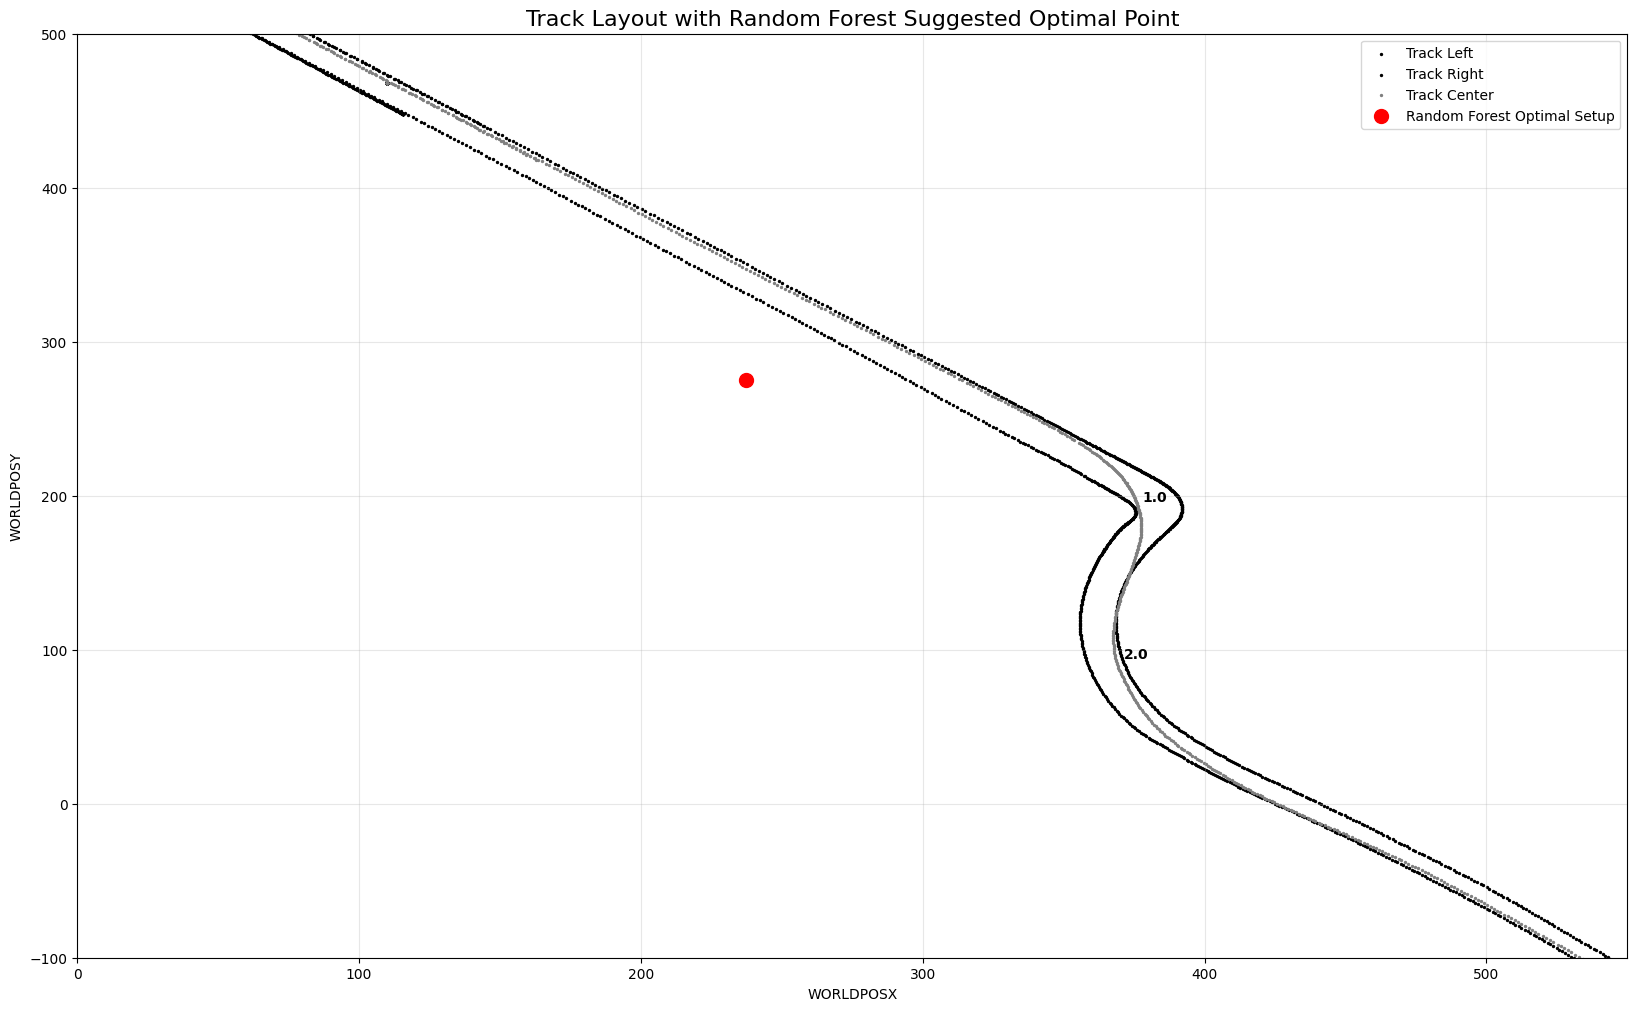

In [14]:
track_left  = pd.read_csv("f1sim-ref-left.csv")
track_right = pd.read_csv("f1sim-ref-right.csv")
track_line  = pd.read_csv("f1sim-ref-line.csv")
turns       = pd.read_csv("f1sim-ref-turns.csv")

f = 100000

plt.figure(figsize=(20, 12))

# Draw track boundaries
plt.scatter(track_left[track_left["FRAME"] <= f]["WORLDPOSX"],
            track_left[track_left["FRAME"] <= f]["WORLDPOSY"],
            s=2, color="black", label="Track Left")
plt.scatter(track_right[track_right["FRAME"] <= f]["WORLDPOSX"],
            track_right[track_right["FRAME"] <= f]["WORLDPOSY"],
            s=2, color="black", label="Track Right")
plt.scatter(track_line[track_line["FRAME"] <= f]["WORLDPOSX"],
            track_line[track_line["FRAME"] <= f]["WORLDPOSY"],
            s=2, color="gray", label="Track Center")

# Plots the suggested optimal setup point from the model

plt.scatter(237.2068, 274.9432, color="red", s=100, label="Random Forest Optimal Setup")

# Annotation of turns
for _, row in turns.iterrows():
    plt.annotate(str(row["TURN"]),
                 (row["APEX_X1"], row["APEX_Y1"]),
                 textcoords="offset points", xytext=(5, 5),
                 color="black", fontsize=10, weight="bold")
# Set zoomed-in limits
plt.xlim(000, 550)
plt.ylim(-100, 500)

plt.xlabel("WORLDPOSX")
plt.ylabel("WORLDPOSY")
plt.title("Track Layout with Random Forest Suggested Optimal Point", fontsize=16)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [15]:
# Config
TARGET = "Target_CURRENTLAPTIMEINMS"

# Feature groups
BPS_FEATS = [
    "BPS_LAPDISTANCE","BPS_WORLDPOSITIONX","BPS_WORLDPOSITIONY",
    "BPS_STEER","BPS_BRAKE","BPS_THROTTLE","BPS_SPEED"
]

BPE_FEATS = [
    "BPE_LAPDISTANCE","BPE_WORLDPOSITIONX","BPE_WORLDPOSITIONY",
    "BPE_STEER","BPE_BRAKE","BPE_THROTTLE","BPE_SPEED"
]

STS_FEATS = [
    "STS_LAPDISTANCE","STS_WORLDPOSITIONX","STS_WORLDPOSITIONY",
    "STS_STEER","STS_BRAKE","STS_THROTTLE","STS_SPEED"
]

STM_FEATS = [
    "STM_LAPDISTANCE","STM_WORLDPOSITIONX","STM_WORLDPOSITIONY",
    "STM_STEER","STM_BRAKE","STM_THROTTLE","STM_SPEED"
]

STE_FEATS = [
    "STE_LAPDISTANCE","STE_WORLDPOSITIONX","STE_WORLDPOSITIONY",
    "STE_STEER","STE_BRAKE","STE_THROTTLE","STE_SPEED"
]

THS_FEATS = [
    "THS_LAPDISTANCE","THS_WORLDPOSITIONX","THS_WORLDPOSITIONY",
    "THS_STEER","THS_BRAKE","THS_THROTTLE","THS_SPEED"
]

THE_FEATS = [
    "THE_LAPDISTANCE","THE_WORLDPOSITIONX","THE_WORLDPOSITIONY",
    "THE_STEER","THE_BRAKE","THE_THROTTLE","THE_SPEED"
]

APX1_FEATS = [
    "APX1_LAPDISTANCE","APX1_WORLDPOSITIONX","APX1_WORLDPOSITIONY",
    "APX1_STEER","APX1_BRAKE","APX1_THROTTLE","APX1_SPEED"
]

APX2_FEATS = [
    "APX2_LAPDISTANCE","APX2_WORLDPOSITIONX","APX2_WORLDPOSITIONY",
    "APX2_STEER","APX2_BRAKE","APX2_THROTTLE","APX2_SPEED"
]

COMBINED_FEATS = sorted(list(set(
    BPS_FEATS + BPE_FEATS + STS_FEATS + STM_FEATS + STE_FEATS + THS_FEATS +
    THE_FEATS + APX1_FEATS + APX2_FEATS
)))

# Data & helpers
y = df[TARGET].astype(float)
y_log = np.log1p(y)

def split_xy(feats):
    X = df[feats].copy()
    return train_test_split(X, y_log, test_size=0.2, random_state=42)


def build_rf():
    return RandomForestRegressor(

        random_state=42
    )

def eval_model(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    # test
    y_pred = np.expm1(model.predict(X_test))
    y_true = np.expm1(y_test)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    # train
    y_tr_pred = np.expm1(model.predict(X_train))
    y_tr_true = np.expm1(y_train)
    train_rmse = np.sqrt(mean_squared_error(y_tr_true, y_tr_pred))
    return train_rmse, rmse, r2, y_pred, model, X_test, y_test

def run_one(name, feats):
    X_train, X_test, y_train, y_test = split_xy(feats)
    model = build_rf()
    tr_rmse, te_rmse, r2, y_pred, model, X_test, y_test = eval_model(
        X_train, X_test, y_train, y_test, model
    )
    return dict(
        Model=name, Train_RMSE_ms=tr_rmse, Test_RMSE_ms=te_rmse, R2=r2,
        X_test=X_test, y_test=y_test, y_pred=y_pred, model=model
    )

# Train runs
runs = []
runs.append(run_one("BPS only", BPS_FEATS))
runs.append(run_one("BPE only", BPE_FEATS))
runs.append(run_one("STS only", STS_FEATS))
runs.append(run_one("STM only", STM_FEATS))
runs.append(run_one("STE only", STE_FEATS))
runs.append(run_one("THS only", THS_FEATS))
runs.append(run_one("THE only", THE_FEATS))
runs.append(run_one("APX1 only", APX1_FEATS))
runs.append(run_one("APX2 only", APX2_FEATS))
runs.append(run_one("Combined", COMBINED_FEATS))

# Comparison table
summary = pd.DataFrame([
    {k: v for k, v in r.items() if k in ["Model", "Train_RMSE_ms", "Test_RMSE_ms", "R2"]}
    for r in runs
]).sort_values("Test_RMSE_ms")

print("Performance comparison")
for _, row in summary.iterrows():
    print(f"{row['Model']:32s} | "
          f"Train RMSE: {row['Train_RMSE_ms']:8.2f} ms | "
          f"Test RMSE: {row['Test_RMSE_ms']:8.2f} ms | "
          f"R²: {row['R2']:6.3f}")

# Sample predictors (grouped) from the combined model
combined = [r for r in runs if r["Model"].startswith("Combined")][0]
i = 0  # choose the row to display
sample = combined["X_test"].iloc[i]
pred_value = combined["y_pred"][i]
actual_value = np.expm1(combined["y_test"].iloc[i])

print("Predictions")
feature_groups = {
    "BPS": BPS_FEATS,
    "BPE": BPE_FEATS,
    "STS": STS_FEATS,
    "STM": STM_FEATS,
    "STE": STE_FEATS,
    "THS": THS_FEATS,
    "THE": THE_FEATS,
    "APX1": APX1_FEATS,
    "APX2": APX2_FEATS,
}
for label, feats in feature_groups.items():
    print(f"\n--- {label} FEATURES ---")
    for col in feats:
        if col in sample.index:
            print(f"{col:25s}: {sample[col]:.4f}")

print(f"\nActual {TARGET}:     {actual_value:,.2f}")
print(f"Predicted {TARGET}:  {pred_value:,.3f}")

Performance comparison
Combined                         | Train RMSE:  2889.50 ms | Test RMSE:  1526.47 ms | R²:  0.607
STE only                         | Train RMSE:  3551.44 ms | Test RMSE:  1645.93 ms | R²:  0.543
STM only                         | Train RMSE:  3555.56 ms | Test RMSE:  1712.25 ms | R²:  0.506
BPS only                         | Train RMSE:  3740.31 ms | Test RMSE:  2053.29 ms | R²:  0.289
THS only                         | Train RMSE:  4172.22 ms | Test RMSE:  2278.19 ms | R²:  0.125
APX2 only                        | Train RMSE:  3446.19 ms | Test RMSE:  2296.51 ms | R²:  0.111
THE only                         | Train RMSE:  3788.86 ms | Test RMSE:  2615.27 ms | R²: -0.153
BPE only                         | Train RMSE:  3694.21 ms | Test RMSE:  2673.00 ms | R²: -0.205
APX1 only                        | Train RMSE:  3896.12 ms | Test RMSE:  2763.76 ms | R²: -0.288
STS only                         | Train RMSE:  2803.60 ms | Test RMSE:  2930.13 ms | R²: -0.448
Predict

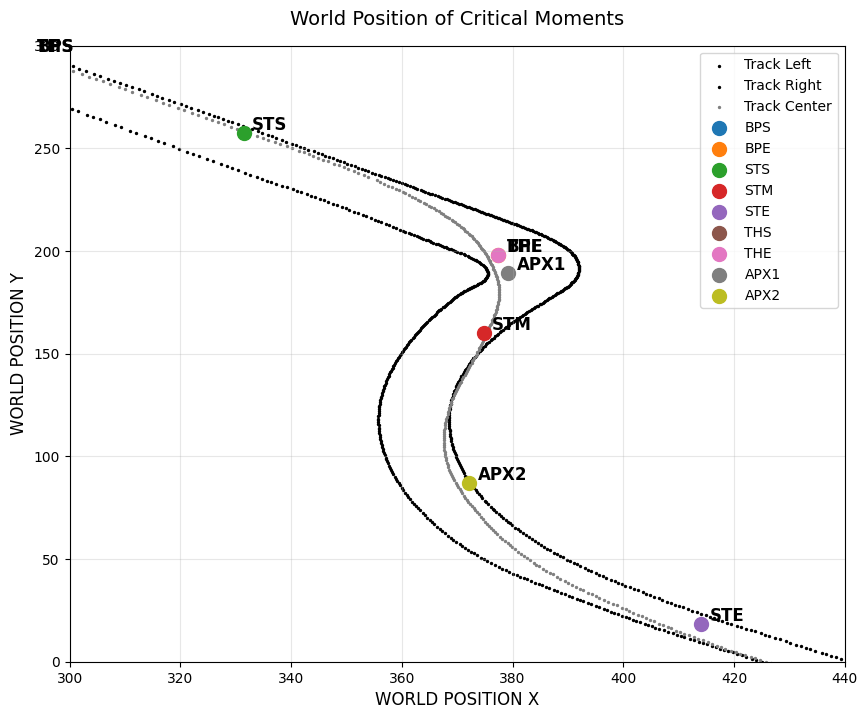

In [16]:

import matplotlib.pyplot as plt

# WORLD POSITION POINTS
points = {
    "BPS": (292.6663, 295.3560),
    "BPE": (377.4632, 197.9525),
    "STS": (331.4129, 257.7154),
    "STM": (374.7644, 160.3347),
    "STE": (414.0892, 18.5734),
    "THS": (292.6663, 295.3560),
    "THE": (377.4632, 197.9525),
    "APX1": (379.2199, 189.2502),
    "APX2": (372.1678, 86.9552),
}

plt.figure(figsize=(10, 8))

# Track boundaries/centerline
plt.scatter(track_left.loc[track_left["FRAME"] <= f,  "WORLDPOSX"],
            track_left.loc[track_left["FRAME"] <= f,  "WORLDPOSY"],
            s=2, color="black", label="Track Left")
plt.scatter(track_right.loc[track_right["FRAME"] <= f, "WORLDPOSX"],
            track_right.loc[track_right["FRAME"] <= f, "WORLDPOSY"],
            s=2, color="black", label="Track Right")
plt.scatter(track_line.loc[track_line["FRAME"] <= f,  "WORLDPOSX"],
            track_line.loc[track_line["FRAME"] <= f,  "WORLDPOSY"],
            s=2, color="gray",  label="Track Center")

# Plot setup
for name, (x, y) in points.items():
    plt.scatter(x, y, s=100, label=name)
    plt.text(x + 1.5, y + 1.5, name, fontsize=12, weight="bold")

# Styling
plt.xlabel("WORLD POSITION X", fontsize=12)
plt.ylabel("WORLD POSITION Y", fontsize=12)
plt.title("World Position of Critical Moments", fontsize=14, pad=15)
plt.grid(alpha=0.3)
plt.legend()
plt.xlim(300, 440)
plt.ylim(0, 300)
plt.show()


In [17]:
from shapely.geometry import Point,Polygon


track_poly = Polygon(
    np.vstack([
        track_left[['WORLDPOSX', 'WORLDPOSY']].values,
        track_right[['WORLDPOSX', 'WORLDPOSY']].values[::-1]
    ])
)


x_cols = sorted([c for c in X if "WORLDPOSITIONX" in c])
y_cols = sorted([c for c in X if "WORLDPOSITIONY" in c])

def sampling(bounds, N, rng, x_cols, y_cols):
    xy_pairs = list(zip(x_cols, y_cols))
    valid = []

    while len(valid) < N:
        cand_idx = rng.integers(0, len(X))
        cand = X.iloc[cand_idx].to_dict()

        all_inside = True
        for xc, yc in xy_pairs:
            x = cand[xc]
            y = cand[yc]

            if not track_poly.contains(Point(x, y)):
                all_inside = False
                break
        if all_inside:
            valid.append(cand)
    return pd.DataFrame(valid)

In [19]:
percentiles = (0.05, 0.95)

bounds = {
    f: (X[f].quantile(percentiles[0]),
        X[f].quantile(percentiles[1]))
    for f in X.columns
}

rng = np.random.default_rng(42)
N = 1000

Xcand = sampling(bounds, N, rng, x_cols, y_cols)
Xcand = Xcand[X.columns]


ycand = random_search_rf.predict(Xcand)

imin = int(np.argmin(ycand))
best_combo_scaled = Xcand.iloc[imin].to_frame().T


best_pred = ycand[imin]

print("\n=== Random Forest-suggested first-brake setup (within observed range) ===")
for k, v in best_combo_scaled.iloc[0].items():
    print(f"{k}: {v:,.4f}")
print(f"Predicted Target_CURRENTLAPTIMEINMS: {best_pred:,.3f}")


=== Random Forest-suggested first-brake setup (within observed range) ===
BPS_THROTTLE: 1.0000
BPS_STEER: 0.0008
BPS_BRAKE: 0.0000
BPS_LAPDISTANCE: 255.0000
BPS_WORLDPOSITIONX: 286.5938
BPS_WORLDPOSITIONY: 300.5659
BPS_ext_LAPDISTANCE: 323.0000
BPE_THROTTLE: 0.0000
BPE_STEER: 0.0415
BPE_BRAKE: 0.9655
BPE_LAPDISTANCE: 324.0000
BPE_WORLDPOSITIONX: 346.5985
BPE_WORLDPOSITIONY: 243.1991
BPE_ext_LAPDISTANCE: 361.0000
THS_THROTTLE: 0.9650
THS_STEER: 0.0010
THS_BRAKE: 0.0073
THS_LAPDISTANCE: 256.0000
THS_WORLDPOSITIONX: 286.5938
THS_WORLDPOSITIONY: 300.5659
THS_ext_LAPDISTANCE: 320.0000
THE_THROTTLE: 0.1957
THE_STEER: 0.2767
THE_BRAKE: 0.0000
THE_LAPDISTANCE: 368.0000
THE_WORLDPOSITIONX: 372.9981
THE_WORLDPOSITIONY: 207.2136
THE_ext_LAPDISTANCE: 397.0000
STS_THROTTLE: 0.0232
STS_STEER: 0.0099
STS_BRAKE: 0.9505
STS_LAPDISTANCE: 308.0000
STS_WORLDPOSITIONX: 335.1599
STS_WORLDPOSITIONY: 254.3952
STS_ext_LAPDISTANCE: 377.0000
STM_THROTTLE: 1.0000
STM_STEER: 0.0000
STM_BRAKE: 0.0000
STM_LAPDISTAN

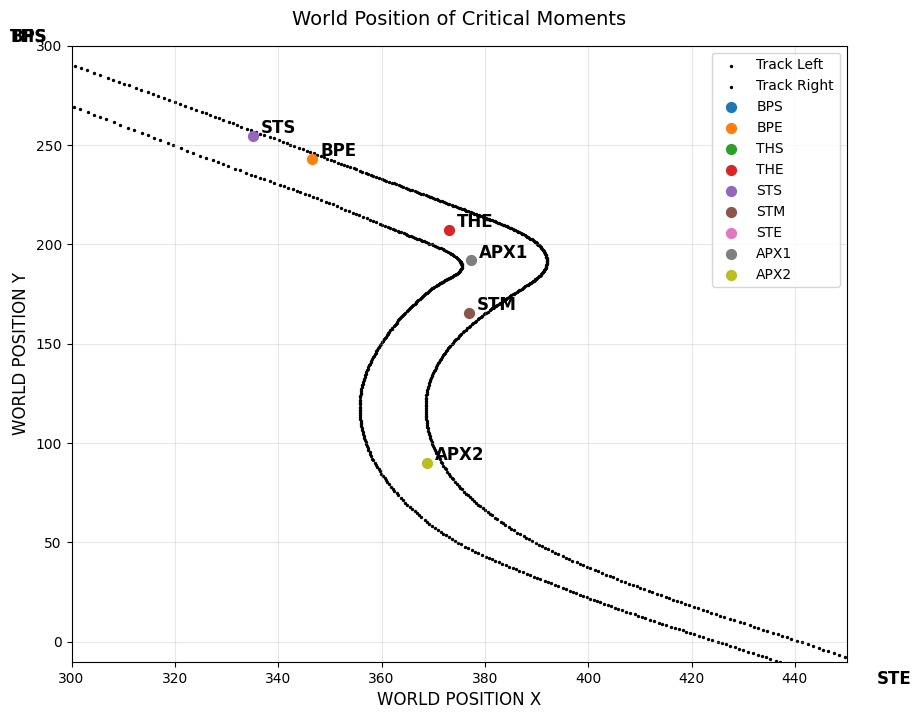

In [22]:
import matplotlib.pyplot as plt

points = {}

prefixes = ["BPS", "BPE", "THS", "THE", "STS", "STM", "STE", "APX1", "APX2"]

row = best_combo_scaled.iloc[0]
for p in prefixes:
    x_col = f"{p}_WORLDPOSITIONX"
    y_col = f"{p}_WORLDPOSITIONY"

    if x_col in row and y_col in row:
        points[p] = (float(row[x_col]), float(row[y_col]))

plt.figure(figsize=(10, 8))
f = 100000
# Track boundaries/centerline
plt.scatter(track_left.loc[track_left["FRAME"] <= f,  "WORLDPOSX"],
            track_left.loc[track_left["FRAME"] <= f,  "WORLDPOSY"],
            s=2, color="black", label="Track Left")
plt.scatter(track_right.loc[track_right["FRAME"] <= f, "WORLDPOSX"],
            track_right.loc[track_right["FRAME"] <= f, "WORLDPOSY"],
            s=2, color="black", label="Track Right")
# plt.scatter(track_line.loc[track_line["FRAME"] <= f,  "WORLDPOSX"],
#             track_line.loc[track_line["FRAME"] <= f,  "WORLDPOSY"],
#             s=2, color="gray",  label="Track Line")

# Plot setup
for name, (x, y) in points.items():
    plt.scatter(x, y, s=50, label=name)
    plt.text(x + 1.5, y + 1.5, name, fontsize=12, weight="bold")

# Styling
plt.xlabel("WORLD POSITION X", fontsize=12)
plt.ylabel("WORLD POSITION Y", fontsize=12)
plt.title("World Position of Critical Moments", fontsize=14, pad=15)
plt.grid(alpha=0.3)
plt.legend()
plt.xlim(300, 450)
plt.ylim(-10, 300)
plt.show()

# LightGBM model

In [ ]:
#lightGBM model
from lightgbm import LGBMRegressor

#fit a base LightGBM model
lightgbm_base = LGBMRegressor(n_estimators=100, random_state=42)
lightgbm_base.fit(X_train, y_train)


#evaluate R2 and MSE base model
y_lightgbmbase_pred = lightgbm_base.predict(X_test)
print("R2 lightgbm_base model:", round(r2_score(y_test, y_lightgbmbase_pred),3))
rmse = np.sqrt(mean_squared_error(y_test, y_lightgbmbase_pred))
print("RMSE lightgbm_base model:", round(rmse,3))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001025 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10497
[LightGBM] [Info] Number of data points in the train set: 653, number of used features: 68
[LightGBM] [Info] Start training from score 14292.695253
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

In [ ]:
#hyperparameter tuning

# Define the model
lgb_model = LGBMRegressor(random_state=42, verbosity=-1)

# Define parameter grid for RandomizedSearchCV
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [-1, 10, 15],
    'min_child_samples': [5, 10, 20],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}


# Randomized Search
random_search_lgb = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_grid,
    n_iter=75,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit model
random_search_lgb.fit(X_train, y_train)

print("Best parameters found:")
print(random_search_lgb.best_params_)

# Predict and evaluate
y_pred_LightGbm = random_search_lgb.predict(X_test)
r2 = r2_score(y_test, y_pred_LightGbm)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_LightGbm))
print("R² Score:", round(r2, 3))
print("RMSE:", round(rmse, 3))

Fitting 5 folds for each of 75 candidates, totalling 375 fits
Best parameters found:
{'subsample': 0.8, 'n_estimators': 200, 'min_child_samples': 5, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
R² Score: 0.799
RMSE: 1454.629


In [ ]:
from sklearn.model_selection import KFold


# Define your model (use best estimator if already tuned)
model = LGBMRegressor(**random_search_lgb.best_params_)  # or grid_search_lgb

# Set up 5-fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store scores
rmse_scores = []
r2_scores = []

# Loop through folds
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train), 1):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Train model
    model.fit(X_tr, y_tr)

    # Predict and evaluate
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    r2 = r2_score(y_val, y_pred)

    rmse_scores.append(rmse)
    r2_scores.append(r2)

    print(f"Fold {fold} — RMSE: {rmse:.3f}, R²: {r2:.3f}")

# Compute stats
rmse_mean = np.mean(rmse_scores)
rmse_std = np.std(rmse_scores)
r2_mean = np.mean(r2_scores)
r2_std = np.std(r2_scores)

# Summary print
print("\n=== Cross-Validation Summary ===")
print(f"Mean RMSE: {rmse_mean:.3f}")
print(f"Std  RMSE: {rmse_std:.3f}")
print(f"Mean R²  : {r2_mean:.3f}")
print(f"Std  R²  : {r2_std:.3f}")

Fold 1 — RMSE: 1313.560, R²: 0.663
Fold 2 — RMSE: 2827.403, R²: 0.594
Fold 3 — RMSE: 2368.045, R²: 0.617
Fold 4 — RMSE: 1405.589, R²: 0.731
Fold 5 — RMSE: 1278.750, R²: 0.671

=== Cross-Validation Summary ===
Mean RMSE: 1838.669
Std  RMSE: 637.909
Mean R²  : 0.655
Std  R²  : 0.047


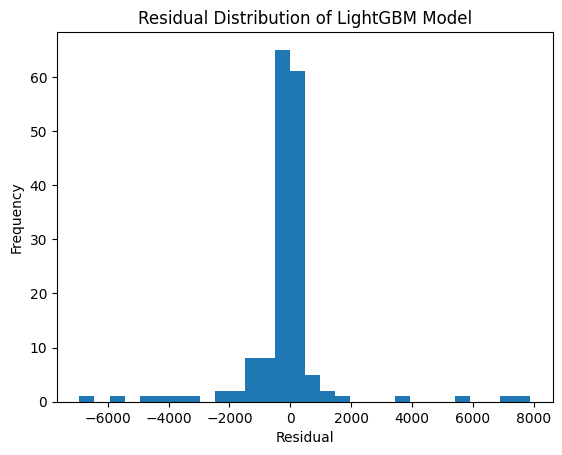

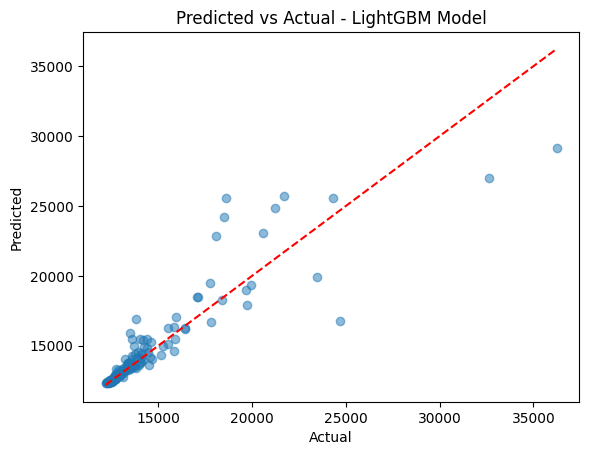

In [ ]:
#assess model quality by plotting residuals and predicted vs actual values - LightGBM
import matplotlib.pyplot as plt
residuals = y_test - y_pred_LightGbm
plt.hist(residuals, bins=30)
plt.title("Residual Distribution of LightGBM Model")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

# Predicted vs Actual
plt.scatter(y_test, y_pred_LightGbm, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual - LightGBM Model")
plt.show()

/tmp/ipython-input-107286162.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


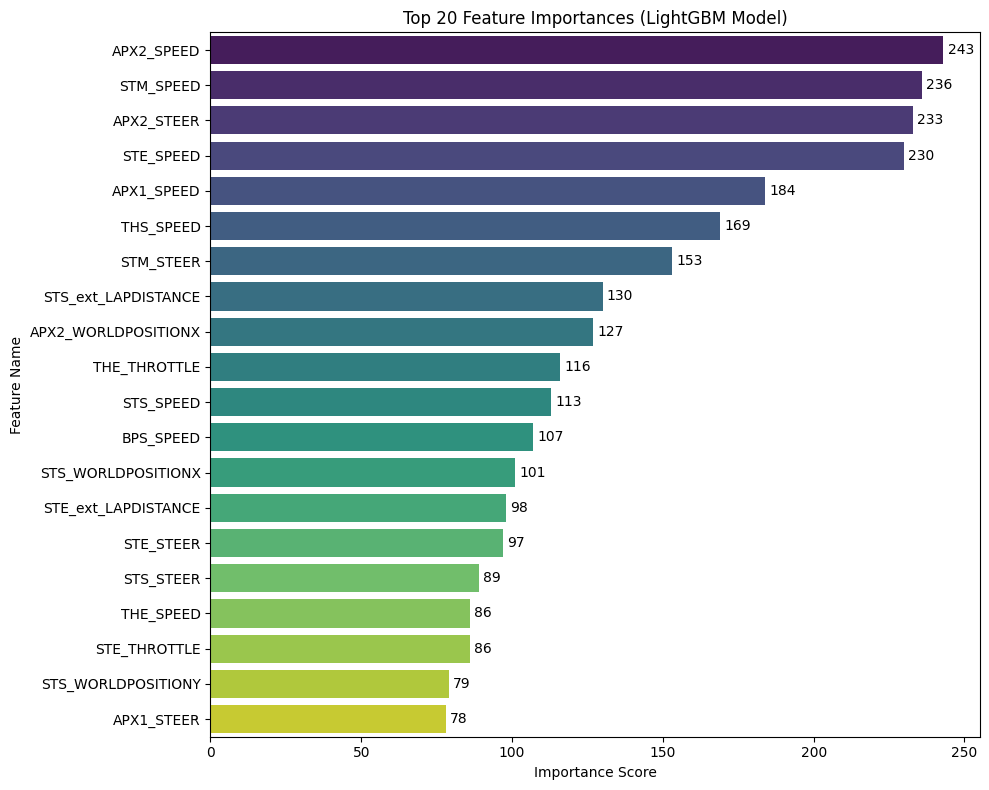

In [ ]:
# Analyse feature importances - LightGBM case
importances = random_search_lgb.best_estimator_.feature_importances_
feature_names = X_train.columns

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

top_20_feat = feat_imp_df.head(20)

# Set plot style
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    x='Importance',
    y='Feature',
    data=top_20_feat,
    palette='viridis'
)

# Add value labels to bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

plt.title('Top 20 Feature Importances (LightGBM Model)')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()


In [ ]:
percentiles = (0.05, 0.95)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
y_scaled_df = pd.DataFrame(Y_scaled, columns=["Target_CURRENTLAPTIMEINMS"])

bounds = {
    f: (X_scaled_df[f].quantile(percentiles[0]), X_scaled_df[f].quantile(percentiles[1]))
    for f in X_scaled_df.columns
}

rng = np.random.default_rng(42)
N = 50_000

candidates = {
    f: rng.uniform(low=b[0], high=b[1], size=N)
    for f, b in bounds.items()
}
Xcand = pd.DataFrame(candidates)[X_scaled_df.columns]

ycand = random_search_lgb.predict(Xcand) #CHANGE "model" TO YOUR INDIVIDUAL MODEL

ycand_unscaled = scaler_y.inverse_transform(ycand.reshape(-1, 1)).ravel()

imin = int(np.argmin(ycand_unscaled))
best_combo_scaled = Xcand.iloc[imin].to_frame().T
best_combo_unscaled = pd.DataFrame(
    scaler_X.inverse_transform(best_combo_scaled),
    columns=X.columns
)

best_pred = ycand_unscaled[imin]

print("\n=== LGBM-suggested first-brake setup (within observed range) ===")
for k, v in best_combo_unscaled.iloc[0].items():
    print(f"{k}: {v:,.4f}")
print(f"Predicted Target_CURRENTLAPTIMEINMS: {best_pred:,.3f}")



=== LGBM-suggested first-brake setup (within observed range) ===
BPS_SPEED: 271.2059
BPS_THROTTLE: 0.6091
BPS_STEER: 0.0029
BPS_BRAKE: 0.0000
BPS_LAPDISTANCE: 275.0000
BPS_WORLDPOSITIONX: 261.9757
BPS_WORLDPOSITIONY: 334.0576
BPS_ext_LAPDISTANCE: 255.5739
BPE_SPEED: 124.3204
BPE_THROTTLE: 0.0524
BPE_STEER: 0.2851
BPE_BRAKE: 0.9986
BPE_LAPDISTANCE: 321.5500
BPE_WORLDPOSITIONX: 343.2086
BPE_WORLDPOSITIONY: 246.2485
BPE_ext_LAPDISTANCE: 421.3109
THS_SPEED: 291.5877
THS_THROTTLE: 0.6361
THS_STEER: 0.0316
THS_BRAKE: 0.5413
THS_LAPDISTANCE: 189.5194
THS_WORLDPOSITIONX: 221.1476
THS_WORLDPOSITIONY: 288.2256
THS_ext_LAPDISTANCE: 327.1820
THE_SPEED: 110.8436
THE_THROTTLE: 0.1080
THE_STEER: 0.1608
THE_BRAKE: 0.1504
THE_LAPDISTANCE: 335.3168
THE_WORLDPOSITIONX: 351.4936
THE_WORLDPOSITIONY: 186.1364
THE_ext_LAPDISTANCE: 598.8814
STS_SPEED: 230.7660
STS_THROTTLE: 0.1219
STS_STEER: 0.0005
STS_BRAKE: 0.6093
STS_LAPDISTANCE: 334.7007
STS_WORLDPOSITIONX: 321.6835
STS_WORLDPOSITIONY: 257.8049
STS_ext_L

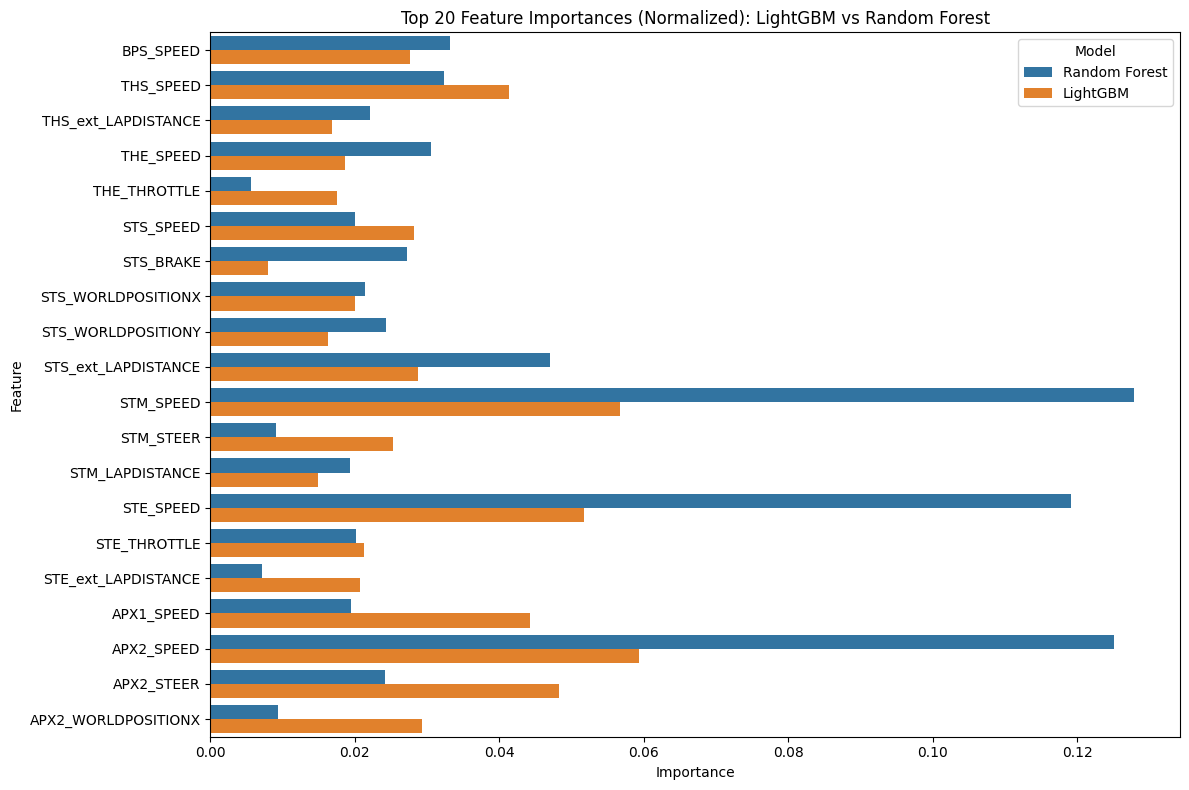

In [ ]:
# Get feature importances
rf_importances = random_search.best_estimator_.feature_importances_
lgb_importances = grid_search_lgb.best_estimator_.feature_importances_
feature_names = X_train.columns

# Normalize both
rf_norm = rf_importances / np.sum(rf_importances)
lgb_norm = lgb_importances / np.sum(lgb_importances)

# Build dataframe
comparison_df = pd.DataFrame({
    'Feature': feature_names,
    'Random Forest': rf_norm,
    'LightGBM': lgb_norm
})

# Melt for seaborn
melted_df = comparison_df.melt(id_vars='Feature', var_name='Model', value_name='Importance')
top_feats = melted_df.groupby('Feature')['Importance'].max().nlargest(20).index
melted_df = melted_df[melted_df['Feature'].isin(top_feats)]

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=melted_df, x='Importance', y='Feature', hue='Model')
plt.title("Top 20 Feature Importances (Normalized): LightGBM vs Random Forest")
plt.tight_layout()
plt.show()


In [ ]:
BPS_Predictors = [
    'BPS_LAPDISTANCE',
    'BPS_CURRENTLAPTIMEINMS',
    'BPS_WORLDPOSITIONX',
    'BPS_WORLDPOSITIONY'
]

# -- 2. data subset and Na drop
use_cols = BPS_Predictors + ['Target_CURRENTLAPTIMEINMS']
BPS_df = df[use_cols].dropna().copy()

X_BPS = BPS_df[BPS_Predictors]
y_BPS = BPS_df['Target_CURRENTLAPTIMEINMS']

# --- 3) Train/test split ---
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.2, random_state=42
)

random_search.fit(X_tr, y_tr)
y_BPS_pred = random_search.predict(X_te)
print("R2 RF_random_search model:", round(r2_score(y_te, y_BPS_pred),3))
print("RMSE RF_random_search model:", round(np.sqrt(mean_squared_error(y_te, y_BPS_pred)), 3))

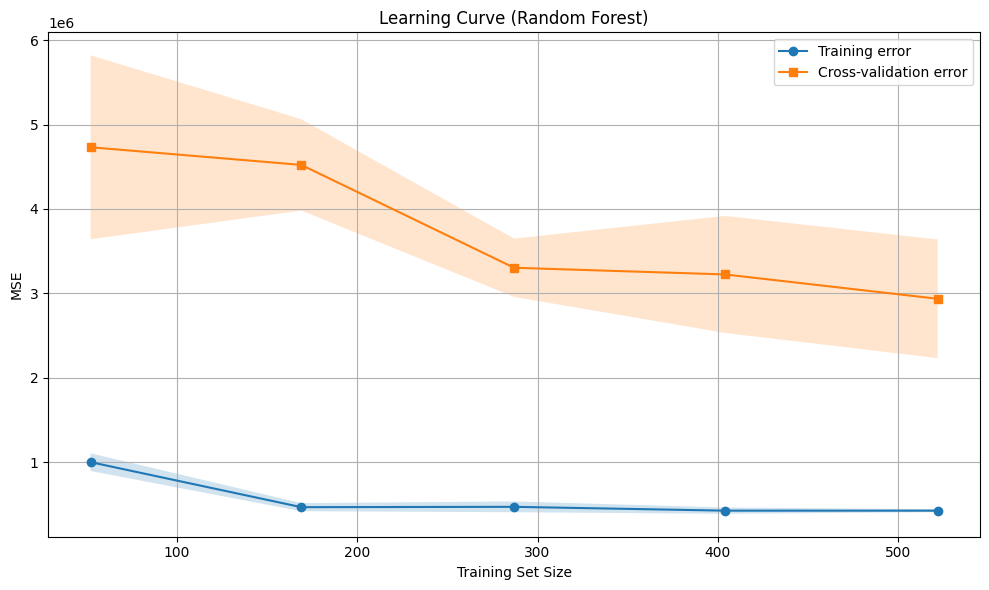

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'
)
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training error", marker='o')
plt.plot(train_sizes, test_mean, label="Cross-validation error", marker='s')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)

plt.title("Learning Curve (Random Forest)")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
